In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split


Decision trees are another standard credit risk model. We will go beyond decision trees by using the trendy XGBoost package in Python to create gradient boosted trees. 

In [2]:
df = pd.read_csv('/Credit-Risk-Modelling/Datasets/loan_data_encoded.csv')
df.sample(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
16577,23,52000,5.0,8000,13.22,0,0.15,4,0,0,...,0,0,0,1,0,0,0,0,0,1
6464,25,50000,8.0,12500,10.65,0,0.25,4,1,0,...,0,0,1,0,0,0,0,0,1,0
5343,23,45000,2.0,6000,7.49,0,0.13,3,1,0,...,0,1,0,0,0,0,0,0,1,0
11410,25,74678,9.0,4000,10.62,0,0.05,2,1,0,...,0,0,1,0,0,0,0,0,1,0
4934,22,40000,6.0,5000,7.43,0,0.13,4,0,0,...,0,1,0,0,0,0,0,0,1,0
32030,40,42996,15.0,15000,16.00,0,0.35,17,0,0,...,0,0,0,0,1,0,0,0,0,1
32561,60,49008,5.0,12000,13.79,0,0.24,21,0,0,...,0,0,0,1,0,0,0,0,0,1
26828,29,115000,13.0,5000,6.03,0,0.04,9,1,0,...,0,1,0,0,0,0,0,0,1,0
30953,40,71000,5.0,7000,15.38,0,0.10,12,1,0,...,0,0,0,0,0,1,0,0,0,1
23614,31,40800,6.0,9000,10.99,0,0.22,6,0,0,...,0,1,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32574 non-null  int64  
 1   person_income                   32574 non-null  int64  
 2   person_emp_length               32574 non-null  float64
 3   loan_amnt                       32574 non-null  int64  
 4   loan_int_rate                   32574 non-null  float64
 5   loan_status                     32574 non-null  int64  
 6   loan_percent_income             32574 non-null  float64
 7   cb_person_cred_hist_length      32574 non-null  int64  
 8   person_home_ownership_MORTGAGE  32574 non-null  int64  
 9   person_home_ownership_OTHER     32574 non-null  int64  
 10  person_home_ownership_OWN       32574 non-null  int64  
 11  person_home_ownership_RENT      32574 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION   

Prepared data for model training


In [4]:
X = df.drop('loan_status', axis=1)
y = df[['loan_status']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=2)

In [6]:
# Train a model
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict probabilities of the model
gbt_preds = clf_gbt.predict_proba(X_test)

In [7]:
# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(np.round(gbt_preds[:,1][0:5] * 100, 2), columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

,loan_status,prob_default
0,0,3.28
1,0,0.65
2,0,6.30
3,0,10.75
4,0,3.08


In [33]:
# make a dataframe for both of models prob of defaults.
dataset = pd.DataFrame({'xgb_prob_default': gbt_preds[:, 1]})
dataset

,xgb_prob_default
0,0.032782
1,0.006460
2,0.063045
3,0.107470
4,0.030844
...,...
13025,0.018710
13026,0.010569
13027,0.083046
13028,0.008422


In [36]:
# load logistic regresion prob predictions
lr_pred = pd.read_csv('/Credit-Risk-Modelling/Datasets/lr_prob_predictions.csv', header=None)
lr_pred

,0,1
0,0.705878,0.294122
1,0.690896,0.309104
2,0.855474,0.144526
3,0.722377,0.277623
4,0.640028,0.359972
...,...,...
13025,0.739356,0.260644
13026,0.982599,0.017401
13027,0.893439,0.106561
13028,0.861436,0.138564


In [39]:
dataset['lr_prob_default'] = lr_pred[1]
dataset

,xgb_prob_default,lr_prob_default
0,0.032782,0.294122
1,0.006460,0.309104
2,0.063045,0.144526
3,0.107470,0.277623
4,0.030844,0.359972
...,...,...
13025,0.018710,0.260644
13026,0.010569,0.017401
13027,0.083046,0.106561
13028,0.008422,0.138564


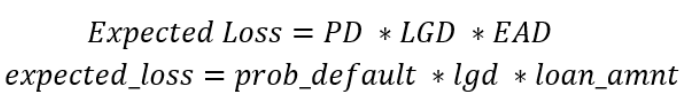

* We assume a LGD (loss given default) of 20%
* Loan amount of my data will be the exposure at default 

In [49]:
dataset['LGD'] = 0.2
dataset['EAD'] = X_test['loan_amnt'].values #  specified values so it doesn't yield nan values
dataset

,xgb_prob_default,lr_prob_default,LGD,EAD
0,0.032782,0.294122,0.2,7000
1,0.006460,0.309104,0.2,5000
2,0.063045,0.144526,0.2,4200
3,0.107470,0.277623,0.2,7000
4,0.030844,0.359972,0.2,12600
...,...,...,...,...
13025,0.018710,0.260644,0.2,10000
13026,0.010569,0.017401,0.2,10000
13027,0.083046,0.106561,0.2,8500
13028,0.008422,0.138564,0.2,4500


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13030 entries, 0 to 13029
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   xgb_prob_default  13030 non-null  float32
 1   lr_prob_default   13030 non-null  float64
 2   LGD               13030 non-null  float64
 3   EAD               13030 non-null  int64  
dtypes: float32(1), float64(2), int64(1)
memory usage: 356.4 KB


In [51]:
# Calculated the expected loss fro both models
dataset['xgb_expected_loss'] = dataset['xgb_prob_default'] * dataset['LGD'] * dataset['EAD']
dataset['lr_expected_loss'] = dataset['lr_prob_default'] * dataset['LGD'] * dataset['EAD']
dataset

,xgb_prob_default,lr_prob_default,LGD,EAD,xgb_expected_loss,lr_expected_loss
0,0.032782,0.294122,0.2,7000,45.894779,411.770432
1,0.006460,0.309104,0.2,5000,6.460193,309.104010
2,0.063045,0.144526,0.2,4200,52.957458,121.401540
3,0.107470,0.277623,0.2,7000,150.458498,388.672132
4,0.030844,0.359972,0.2,12600,77.727549,907.129080
...,...,...,...,...,...,...
13025,0.018710,0.260644,0.2,10000,37.419856,521.288817
13026,0.010569,0.017401,0.2,10000,21.138025,34.802887
13027,0.083046,0.106561,0.2,8500,141.178422,181.153550
13028,0.008422,0.138564,0.2,4500,7.580198,124.707799


In [52]:
# Print the sum of the expected loss for gbt
print('LR expected loss: ', np.sum(dataset['lr_expected_loss']))
print('XGB expected loss: ', np.sum(dataset['xgb_expected_loss']))

LR expected loss:  6165975.947916928
XGB expected loss:  6046466.023305291


When we talk about accuracy and precision, the goal is to generate models which have a low expected loss.